[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00373723] [loc=9.557 scale=9.722]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.000445613] [loc=0.000 scale=9.557]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.000455771] [loc=-557.344 scale=557.344]
[distfit] >INFO> [dweibull  ] [0.05 sec] [RSS: 0.00249125] [loc=6.000 scale=6.147]
[distfit] >INFO> [t         ] [0.09 sec] [RSS: 0.00157685] [loc=6.335 scale=4.777]
[distfit] >INFO> [genextreme] [0.07 sec] [RSS: 0.000279533] [loc=4.524 scale=4.632]
[distfit] >INFO> [gamma     ] [0.07 sec] [RSS: 0.00105706] [loc=-0.000 scale=9.814]
[distfit] >INFO> [lognorm   ] [0.09 sec] [RSS: 0.000416725] [loc=-1.261 scale=7.530]
[distfit] >INFO> [beta      ] [0.11 sec] [RSS: 0.000632666] [loc=-0.000 scale=430.856]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.00808918] [loc=0.000 scale=55.000]
[distfit] >INFO> [loggamma  ] [0.07 sec] [RSS: 0.00383806] [loc=-2910.253 scale=398.059]
[distfit] >INFO> 

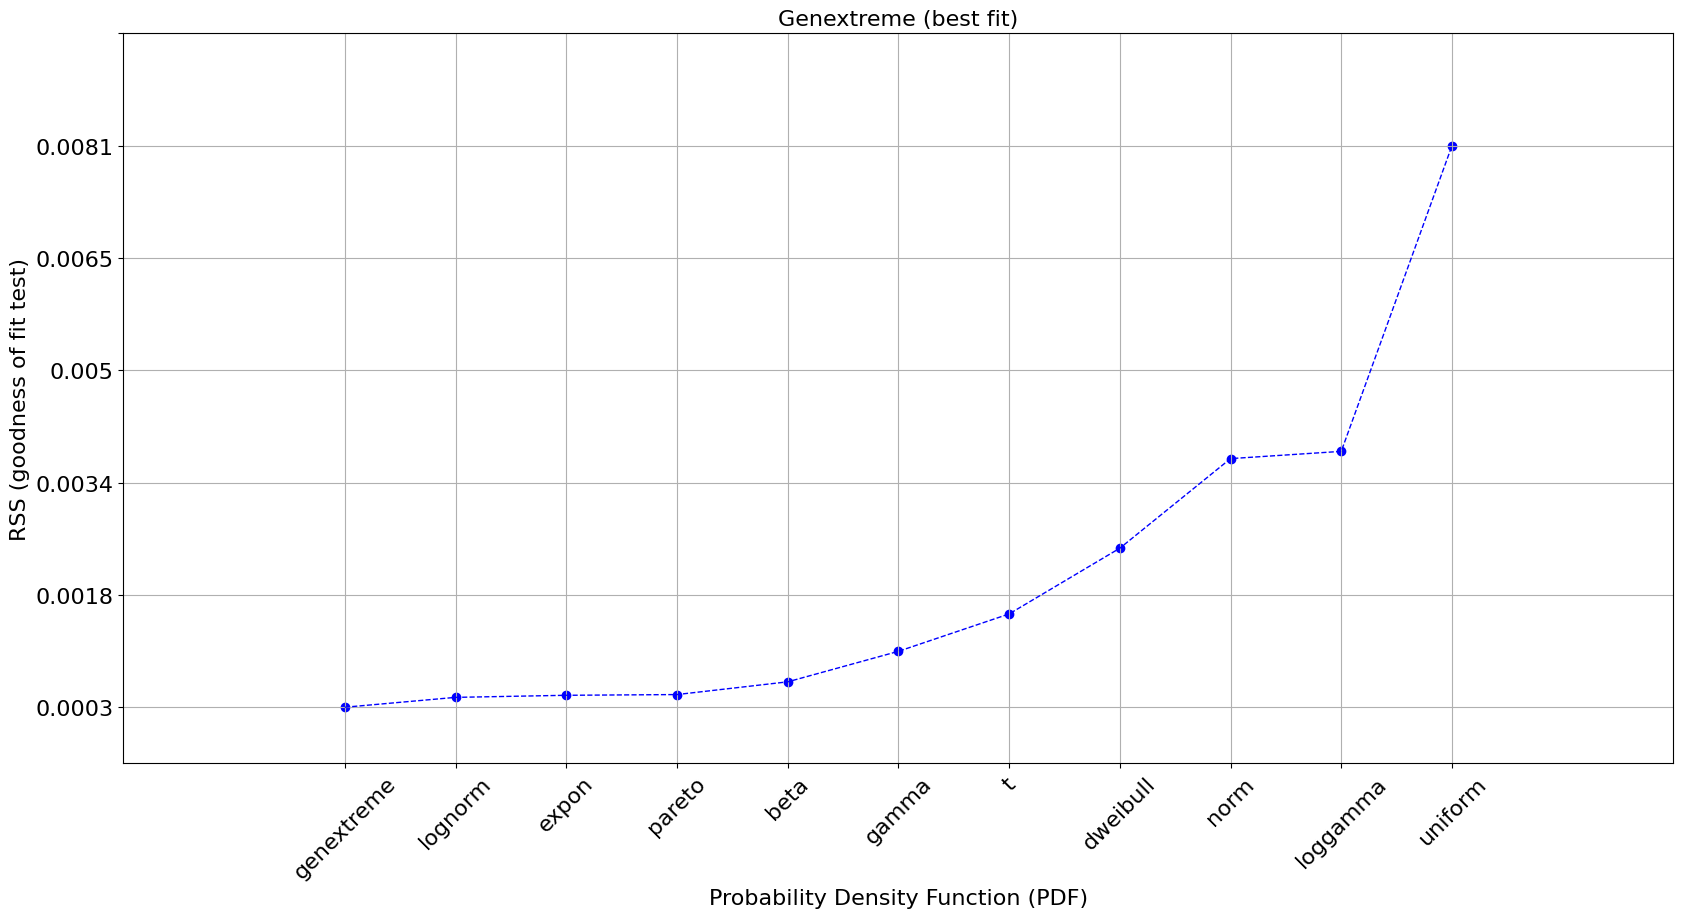

11035

In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

from distfit import distfit

#%%

llegadas = pd.read_csv("C:\\Users\\JUAN\\Desktop\\Tesis\\cur_estadistica\\llegadas_restaurante.csv")
platillos = pd.read_csv("C:\\Users\\JUAN\\Desktop\\Tesis\\cur_estadistica\\platillos.csv")
bebidas = pd.read_csv("C:\\Users\\JUAN\\Desktop\\Tesis\\cur_estadistica\\bebidas.csv")

#%%

llegadas.columns
llegadas.head(20)

#%%

llegadas["Hora_Llegada"]

llegadas["Tamaño_Grupo"]


#%%

##### Preprocesamiento

llegadas["hora_llegada"] = pd.to_datetime(llegadas["Hora_Llegada"],
                                          format='%H:%M')

#%%

llegadas["espera"] = llegadas["hora_llegada"].diff().dt.total_seconds()/60

#%%

ggplot(data=llegadas) + geom_histogram(mapping=aes(x="espera"),binwidth=5)

#%%%

################### Distribución de los tiempos de espera entre llegada y llegada

t_espera = llegadas["espera"][1:]


mi_modelo = distfit(todf=True)
mi_modelo.fit_transform(t_espera)
resultado = mi_modelo.summary

mi_modelo.plot_summary()
plt.show()

''' entonces los tiempos de espera entre llegadas es exponencial con scale=9.55'''

#%%

ggplot(data=llegadas) + geom_histogram(mapping=aes(x="Tamaño_Grupo"),binwidth=1)

#%%

freq_rel = llegadas["Tamaño_Grupo"].value_counts(normalize=True)

#%%

########## Simulación de un día de trabajo

tiempo = 0
total_llegadas = 0

while tiempo < 600:
    total_llegadas = total_llegadas + 1
    tiempo = tiempo + np.random.exponential(scale=9.55)
    
total_llegadas    

clientes = np.random.choice(freq_rel.index,total_llegadas,p=freq_rel.values)
len(clientes)


df_clientes = pd.DataFrame({"total":clientes})

ggplot(data=df_clientes) + geom_histogram(mapping=aes(x="total"),binwidth=1)


#%%

# bebidas
# platillos

pago_clientes = []

for n_cliente in clientes:
    pago_comida = np.random.choice(platillos["Precio"],n_cliente,replace=True).sum()
    pago_bebida = np.random.choice(bebidas["Precio"],n_cliente,replace=True).sum()
    pago_clientes.append(pago_comida+pago_bebida)

#%%

sum(pago_clientes)

DADA 3 TABLAS DE UN RESTAURANTE llegadas que contiene 2 columnas, hora de llegada y cuantas personas llegaron en esa 
llegada, la segunda tabla es platillos que contiene el nombre y costo en 2 columnas, por ultimo bebidas que es lo mismo que
platillos, pregunta la dueña que cuanto en promedio gana al dia.

primero realizas un preprocesamiento de datos es decir las horas de llegadas las conviertes a minutos y de ahi la diferencia
del que llego primero al segundo, del segundo al tercero, etc. 
posterior buscas que distribucion queda mejor, una vez eso simulas los tiempos de llegada 
para saber cuantas personas llegaron por cada llegada (atencion) verificas la frecuencia relativa y de ahi tomas conforme a la
probabilidad numeros que indiquen cuantas personas llegaron por atencion
posterior haces lo mismo con la comida y bebida, realizas suma del costo y listo 
hasta aqui simulaste un dia 
´posterior solo simulas muchos dias y promedias

In [3]:
######### Voy a crear una función que replique la simulación de un día de trabajo

def simulacion():
    tiempo = 0
    total_llegadas = 0

    while tiempo < 600:
        total_llegadas = total_llegadas + 1
        tiempo = tiempo + np.random.exponential(scale=9.55)
        
    clientes = np.random.choice(freq_rel.index,total_llegadas,p=freq_rel.values)
    pago_clientes = []

    for n_cliente in clientes:
        pago_comida = np.random.choice(platillos["Precio"],n_cliente,replace=True).sum()
        pago_bebida = np.random.choice(bebidas["Precio"],n_cliente,replace=True).sum()
        pago_clientes.append(pago_comida+pago_bebida)
    return sum(pago_clientes)

In [4]:
#simulo 3000  dias, sumo las ganancias de cada dia y lo divido entre los dias simulados 
#por el tlc  el resultado es la media de la ganancia por dia
dias_simulados = 3000
sum([simulacion() for x in range(dias_simulados)]) / dias_simulados

12041.596666666666